In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [18]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
df.Price

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [21]:
df_price = df['Price'].value_counts()
df_price

1100000.0    113
1300000.0    109
650000.0     109
800000.0     109
600000.0     104
            ... 
1928000.0      1
2236000.0      1
601500.0       1
550500.0       1
1323000.0      1
Name: Price, Length: 2204, dtype: int64

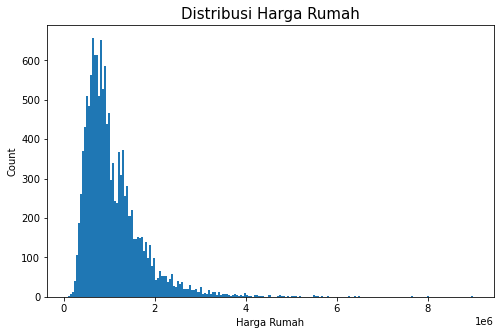

In [30]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_price)
df.Price.plot(kind='hist', figsize=(8, 5), bins=200)

plt.title('Distribusi Harga Rumah' , size = 15) # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Harga Rumah') # add x-label

plt.show()

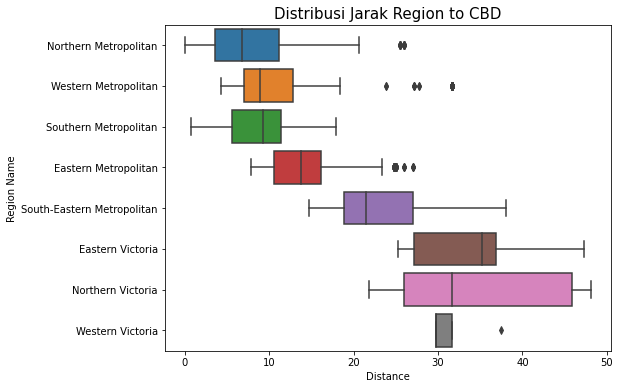

In [31]:
plt.figure(figsize = (8 , 6))
sns.boxplot(x=df['Distance'], y = df['Regionname'])

plt.title('Distribusi Jarak Region to CBD', size = 15)
plt.ylabel('Region Name')

plt.show()

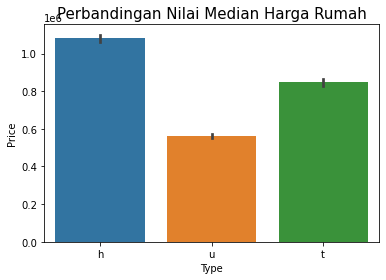

In [34]:
sns.barplot(x = df.Type , y =df.Price, estimator = np.median)

plt.title('Perbandingan Nilai Median Harga Rumah', size = 15)


plt.show()

Text(0.5, 1.0, 'Korelasi Harga Rumah dan Jarak Rumah ke CBD')

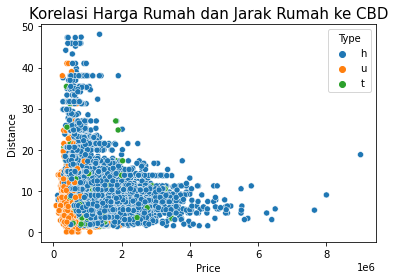

In [37]:
sns.scatterplot(x = df.Price , y = df.Distance, hue = df.Type )
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size = 15)


C:\Users\yondha.dwika\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yondha.dwika\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yondha.dwika\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yondha.dwika\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY form

<AxesSubplot:xlabel='Month', ylabel='Price'>

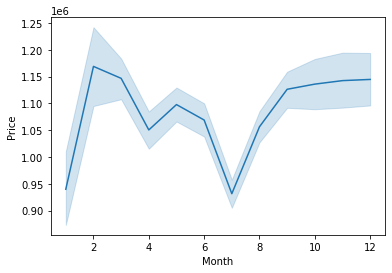

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = pd.DatetimeIndex(df['Date']).month

sns.lineplot(x = df.Month, y = df.Price)

Text(0.5, 1.0, 'Tren Harga Rumah Per Bulan berdasarkan Tipe')

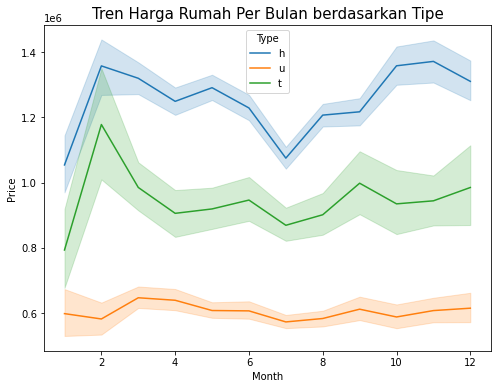

In [42]:
plt.figure(figsize = (8,6))
sns.lineplot(x = df.Month, y = df.Price, hue = df.Type)
plt.title('Tren Harga Rumah Per Bulan berdasarkan Tipe', size = 15)